In [14]:
import  pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv('data/device1.csv')

In [16]:
df.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,284361.000000,284361.000000,284361.000000,284361.000000,284361.000000,284361.000000,284361.000000,284361.000000,284361.000000,284361.000000
mean,385.019971,48.574154,838.405304,133.833773,441.888374,164.834777,892.106055,612.700300,27.126435,44.574886
std,926.700338,1012.584537,1008.805147,96.728168,121.228241,26.307527,158.076827,59.080876,3.464868,6.596029
min,-32768.000000,-32664.000000,0.000000,0.000000,119.000000,66.000000,10.000000,435.000000,19.500000,24.500000
25%,0.000000,2.000000,605.680000,102.490000,350.000000,148.000000,913.000000,572.000000,24.500000,41.100000
50%,410.000000,11.000000,727.670000,123.480000,438.000000,162.000000,926.000000,608.000000,26.600000,44.200000
75%,448.000000,51.000000,918.250000,154.890000,527.000000,180.000000,938.000000,651.000000,29.100000,47.800000
max,28827.000000,29206.000000,37844.010000,7602.580000,885.000000,373.000000,1000.000000,877.000000,41.400000,71.000000


In [17]:
df2 = df[(df != 0).all(axis=1)].dropna()
df2 = df.iloc[0:121598, :]  


In [18]:
df2.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,121598.000000,121598.000000,121598.000000,121598.000000,121598.000000,121598.000000,121598.000000,121598.000000,121598.000000,121598.000000
mean,617.447326,101.736846,612.737676,111.105283,392.541349,157.826897,853.818632,582.068546,29.853286,42.266795
std,1342.341572,1546.773032,361.599888,59.593147,97.959070,22.605406,230.628674,48.433911,3.215091,4.737283
min,-32768.000000,-32664.000000,0.000000,0.000000,119.000000,66.000000,10.000000,435.000000,22.000000,29.000000
25%,425.000000,46.000000,534.332500,99.540000,319.000000,144.000000,916.000000,553.000000,28.000000,40.500000
50%,449.000000,55.000000,645.650000,117.190000,391.000000,158.000000,927.000000,584.000000,29.300000,43.000000
75%,712.000000,73.000000,772.427500,141.970000,462.000000,172.000000,935.000000,613.000000,30.500000,45.200000
max,28827.000000,29206.000000,8000.140000,1223.350000,852.000000,292.000000,1000.000000,817.000000,41.400000,65.800000


In [19]:
df2["ts"] = pd.to_datetime(df["ts"], format='mixed', errors='coerce')
df2.set_index("ts", inplace=True)  # Set timestamp as index

/tmp/ipykernel_6205/3433310979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["ts"] = pd.to_datetime(df["ts"], format='mixed', errors='coerce')


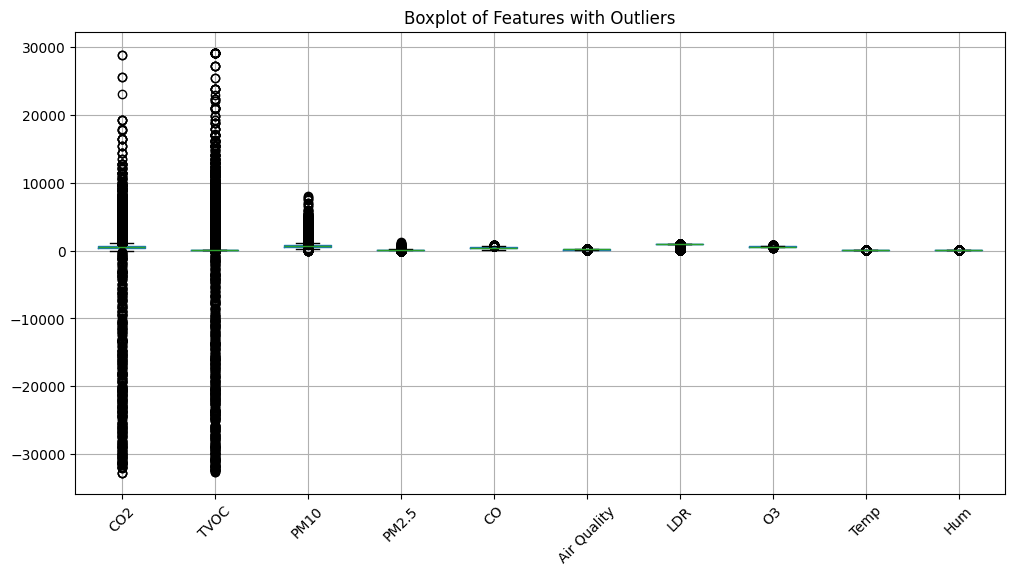

In [20]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

Q1 = df2[num_cols].quantile(0.25)
Q3 = df2[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df2[num_cols] < lower_bound) | (df2[num_cols] > upper_bound))

# Draw boxplots
plt.figure(figsize=(12, 6))
df2[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [21]:
df2 = df2[~outliers.any(axis=1)]  # Keep only non-outlier rows


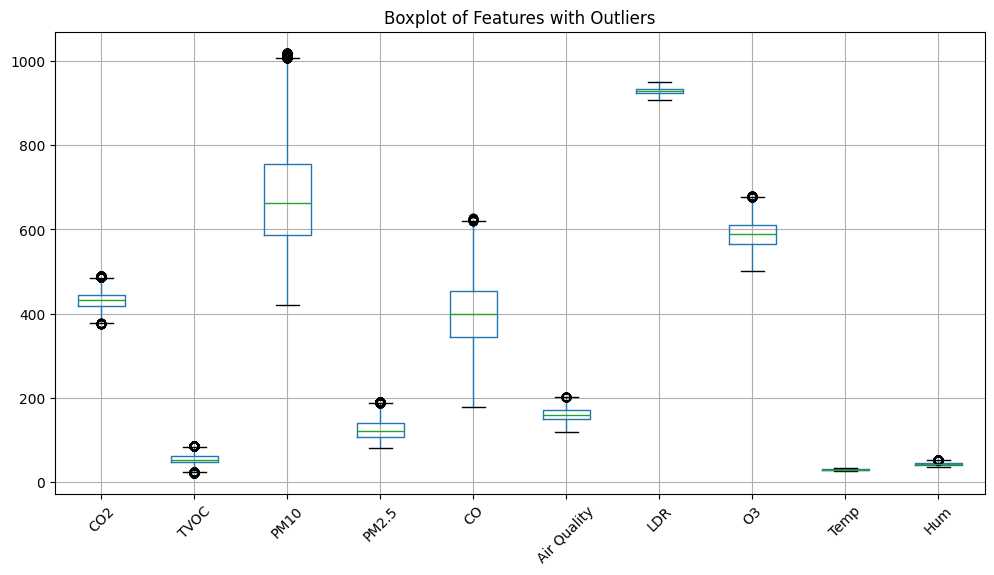

In [22]:
for _ in range(2):  # Run twice to catch new outliers
    Q1 = df2[num_cols].quantile(0.25)
    Q3 = df2[num_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df2[num_cols] < lower_bound) | (df2[num_cols] > upper_bound))
    df2 = df2[~outliers.any(axis=1)]  # Remove outliers again


# Draw boxplots
plt.figure(figsize=(12, 6))
df2[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [23]:
df2.shape

(54674, 10)

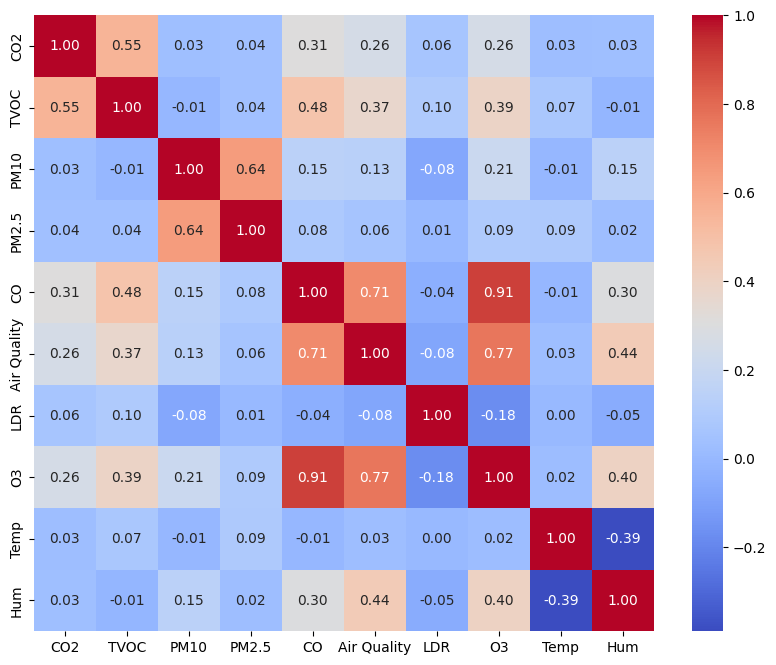

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df2.corr()  # No need to drop anything

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
